# Playing around a bit

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.dpi"] = 150

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../functions/")

In [4]:
import utils
from analytical import basis_map
from main import predict
from computer_vision import otsu

/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [5]:
TRAIN_PATH = "../data/training/"
TEST_PATH = "../data/testing/"
X_train, Y_train, X_test = utils.load_data(TRAIN_PATH, TEST_PATH)

Getting and resizing train images and masks ... 


100%|██████████| 670/670 [01:39<00:00,  6.71it/s]

Getting and resizing test images ... 



100%|██████████| 65/65 [00:00<00:00, 65.41it/s]

Done!


In [6]:
X_train.shape

(670, 128, 128, 3)

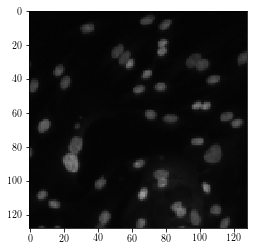

In [7]:
plt.imshow(X_train[0])

(array([ 14521.,      0.,    191.,      0.,    101.,    144.,      0.,
           147.,      0.,   1280.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

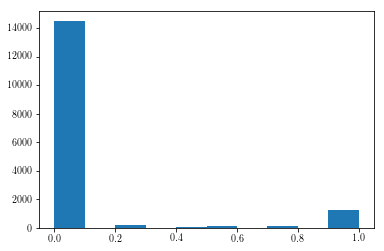

In [9]:
plt.hist(Y_train[0].flatten())

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


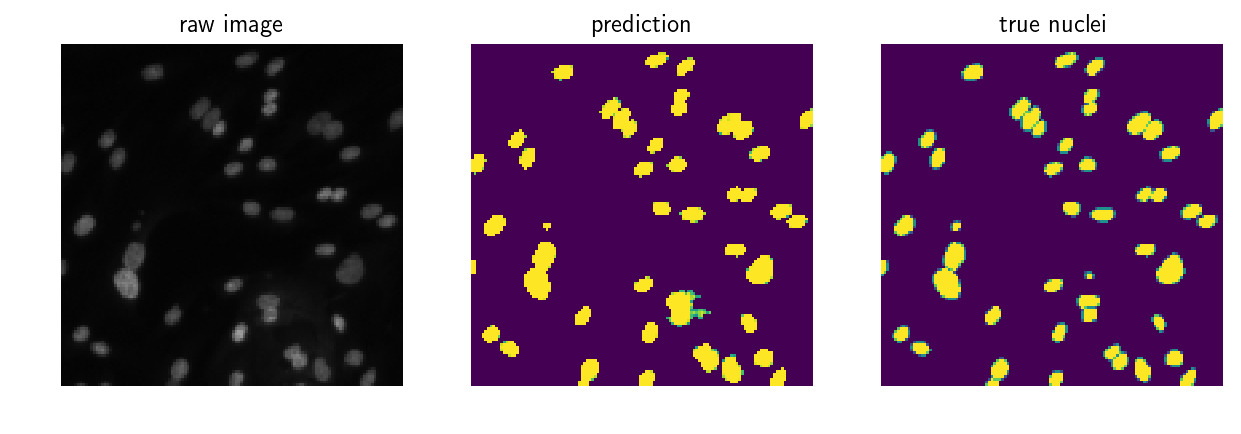

In [29]:
from visualization import viz_prediction

im_num = 0
viz_prediction(X_train[im_num], Y_train[im_num])
plt.show()

In [39]:
from skimage import feature, measure, segmentation
from scipy import ndimage

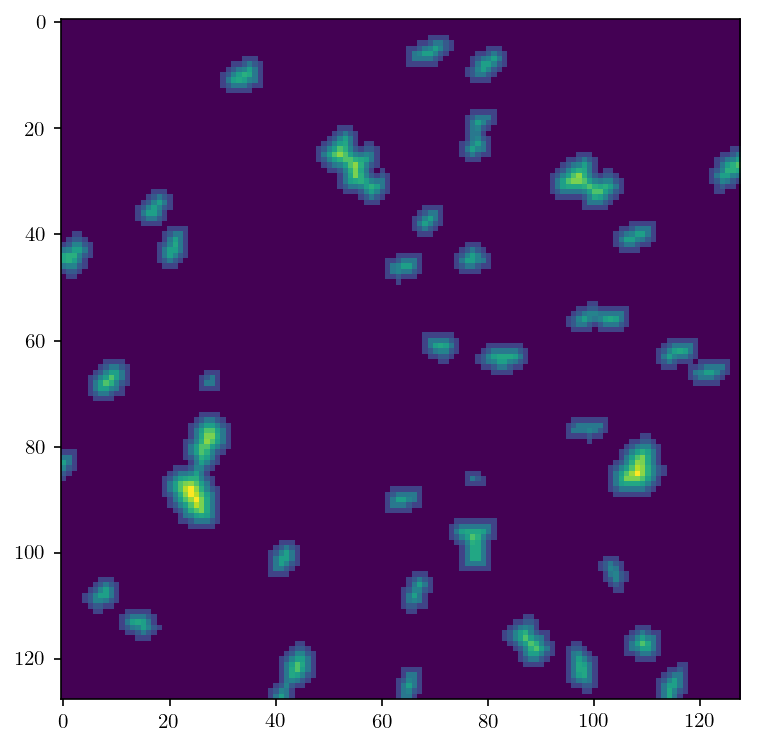

In [53]:
image = Y_train[0]
dt = ndimage.distance_transform_edt(image)
plt.imshow(dt)

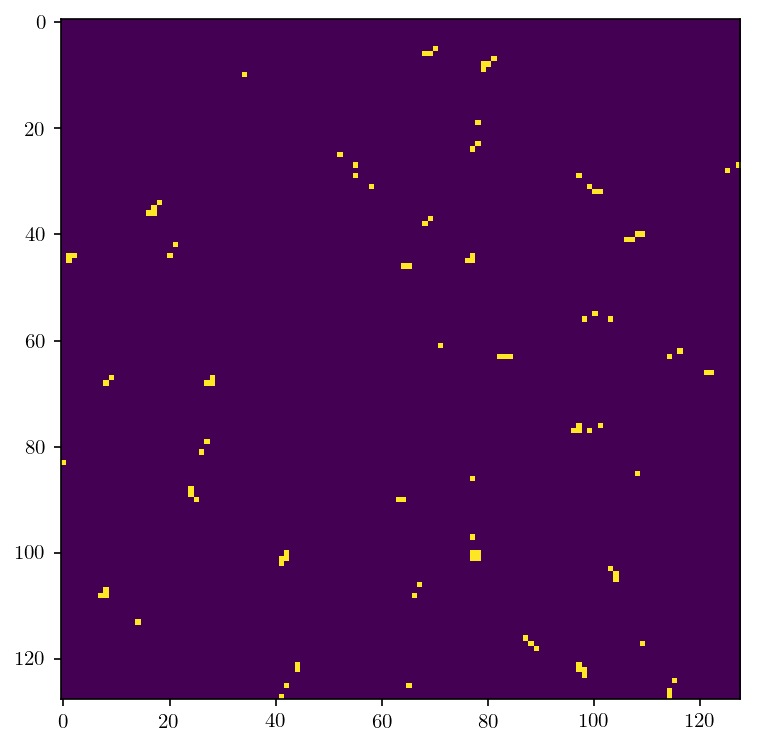

In [54]:
local_peaks = feature.peak_local_max(dt, exclude_border=False, indices=False)
plt.imshow(local_peaks)

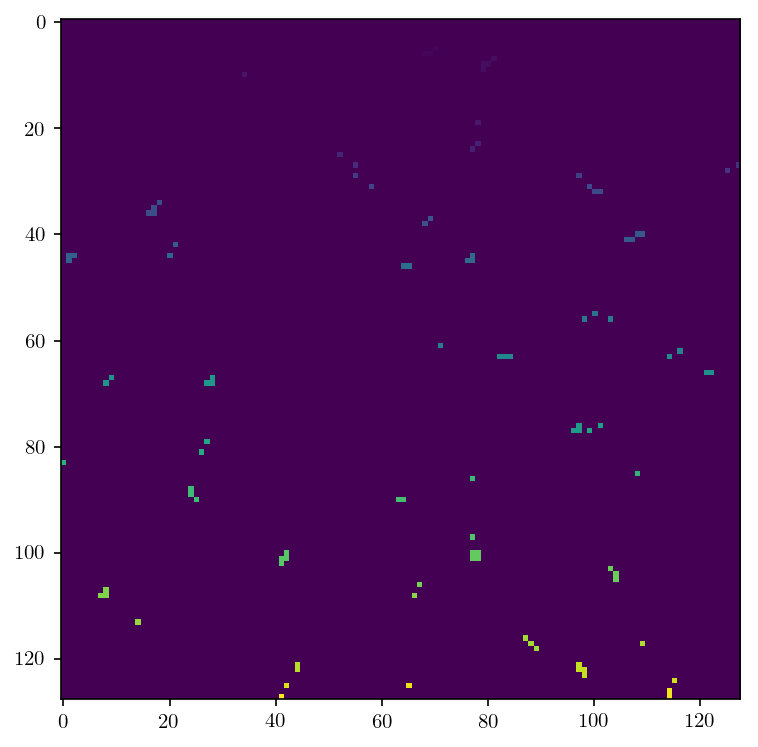

In [55]:
markers = measure.label(local_peaks)

plt.imshow(markers)

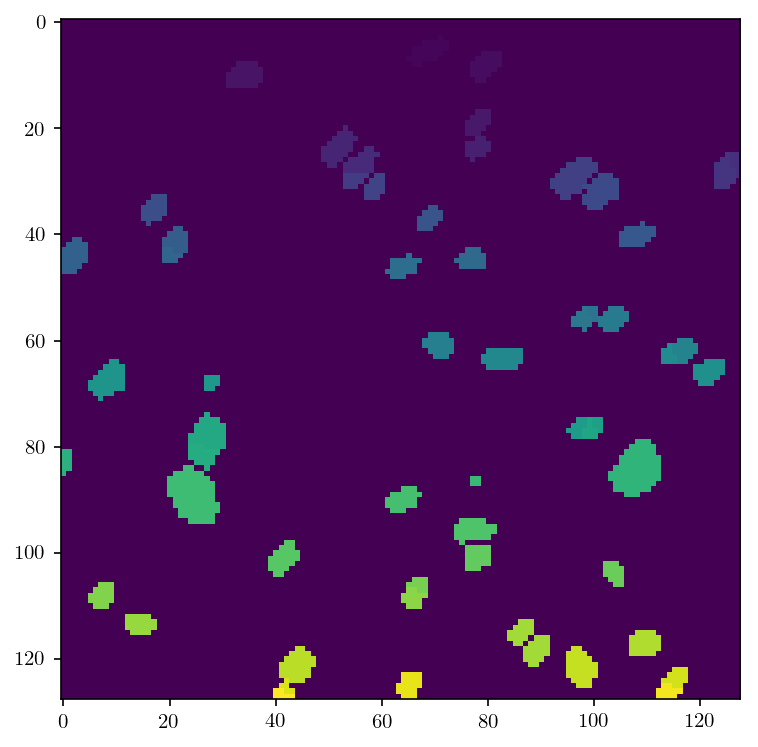

In [58]:
labels_ws = segmentation.watershed(-dt, markers, mask=image)

plt.imshow(labels_ws)

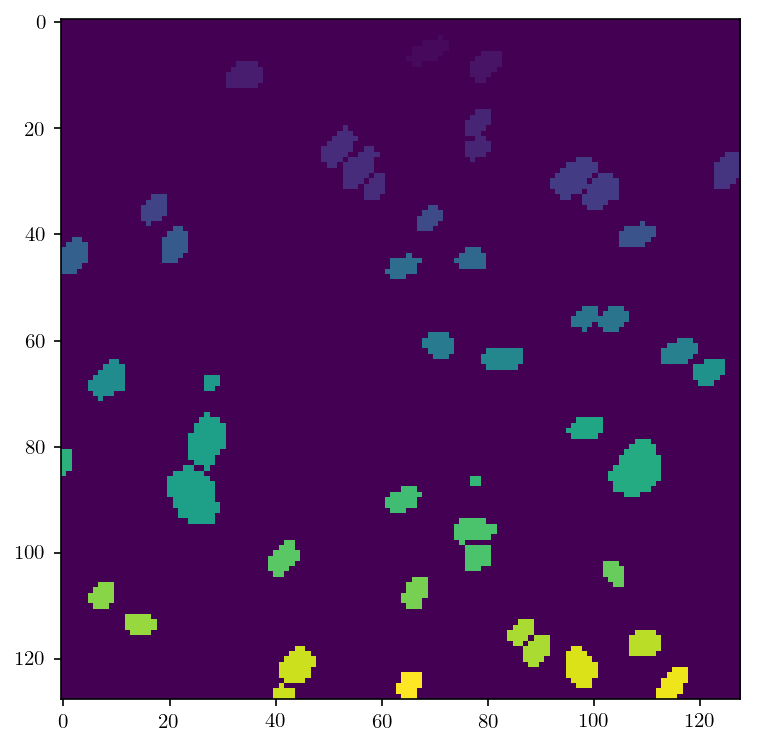

In [61]:
plt.imshow(measure.label(image))

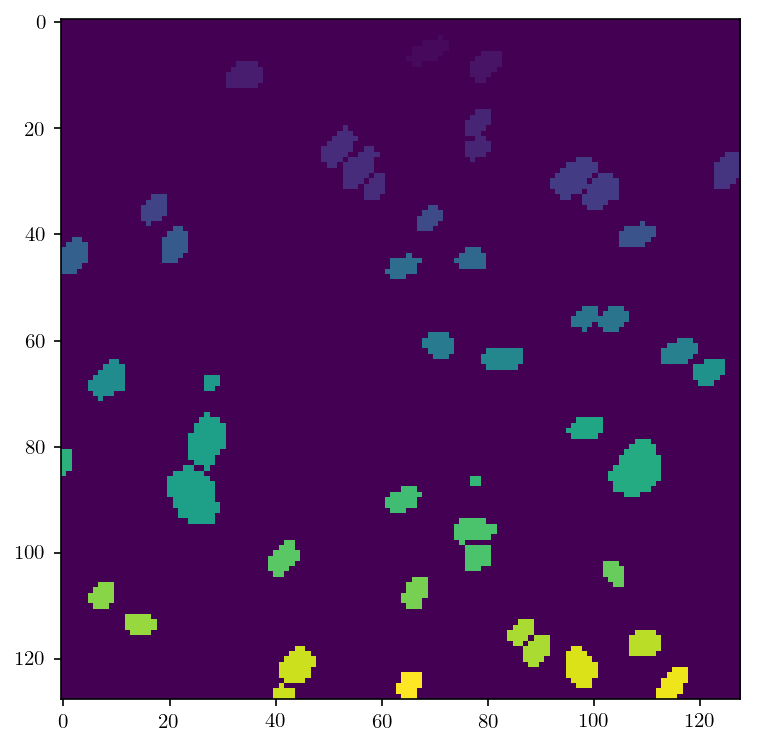

In [61]:
plt.imshow(measure.label(image))

In [62]:
from components import watershed_cc, measure_label_cc

# rle encoding

In [108]:
imnum = 1
image = X_train[imnum]
mask = Y_train[imnum]

pred = predict(image)
#ccs_wshed = watershed_cc(pred)

dt = ndimage.distance_transform_edt(pred)
peaks = feature.peak_local_max(dt, exclude_border = False, indices = False)
markers = measure.label(peaks)
seg = segmentation.watershed(-dt, markers, mask = pred)

sparse


/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


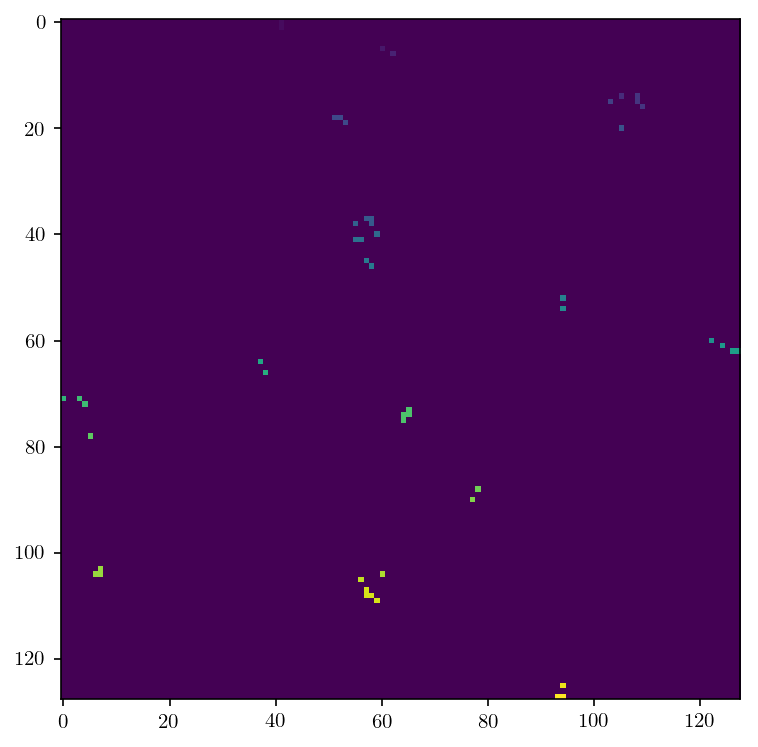

In [109]:
plt.imshow(seg)

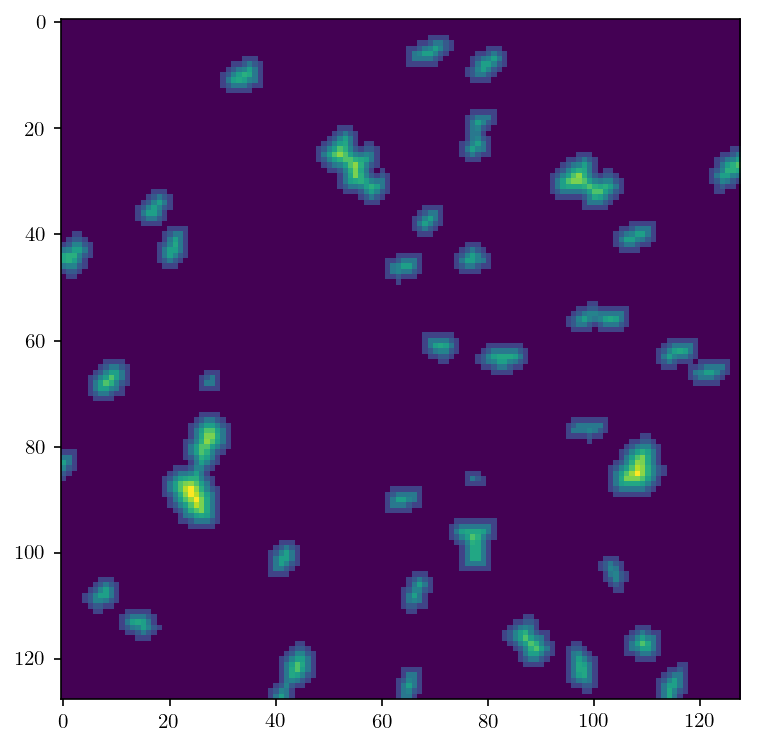

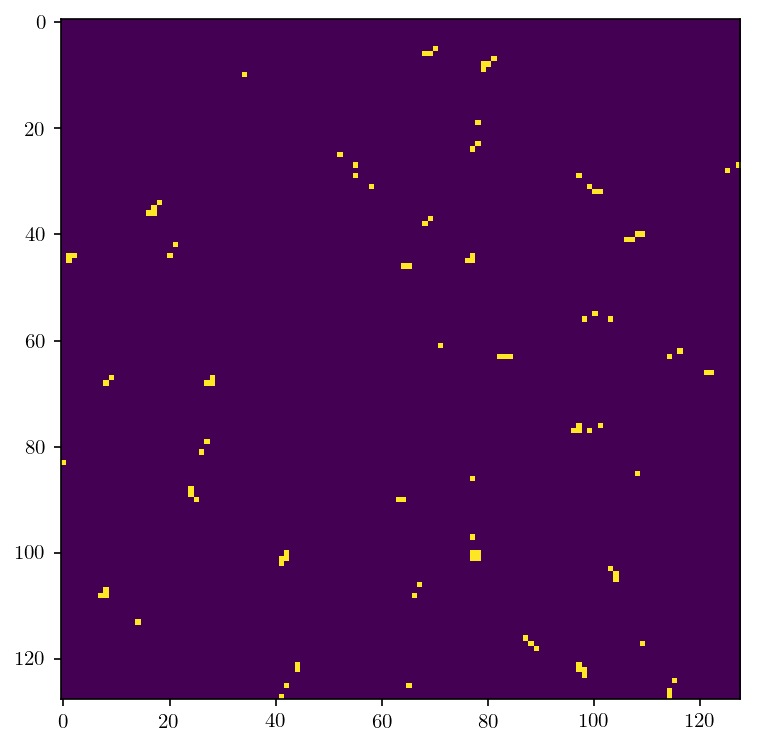

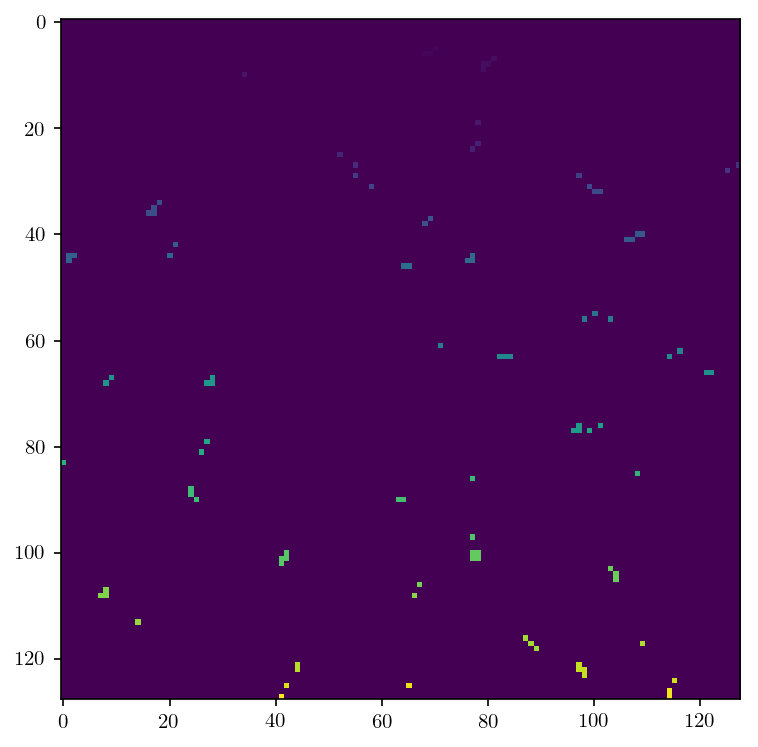

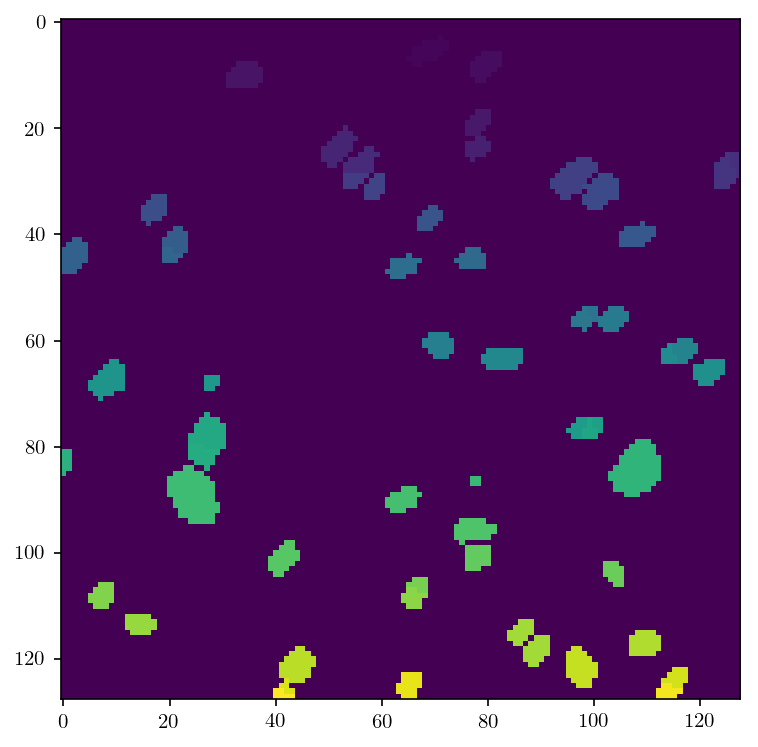

In [88]:
image = Y_train[0]
dt = ndimage.distance_transform_edt(image)
plt.imshow(dt)
plt.show()

local_peaks = feature.peak_local_max(dt, exclude_border=False, indices=False)
plt.imshow(local_peaks)
plt.show()

markers = measure.label(local_peaks)

plt.imshow(markers)
plt.show()

labels_ws = segmentation.watershed(-dt, markers, mask=image)

plt.imshow(labels_ws)
plt.show()